In [3]:
setwd('C:/Users/iceca/Documents/Earthquake_Damage_Predictor/')
library(tidyverse)
library(ggplot2)

In [16]:
loadNF <- modules::use('Helpers/Load_Num_Factor.R')
manipulate <- modules::use('Helpers/Manipulate.R')
numTrain <- loadNF$num()[[1]]
factorTrain <- loadNF$factor()[[1]]
labels <- loadNF$factor()[[2]] #num and factor features have the same labels
numTrain <- manipulate$combineLab(numTrain, labels)
factorTrain <- manipulate$combineLab(factorTrain, labels)

Joining, by = c("X", "building_id")
Joining, by = "X"


In [21]:
numTrain[1,]
factorTrain[1,]

X,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
1,802906,6,487,12198,2,30,6,5,1,...,0,0,0,0,0,0,0,0,0,3


X,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,building_id,damage_grade
1,t,r,n,f,q,t,d,v,802906,3


[1] 234540     32

[1] 234540      9

[1] 234540      3

[1] "X"            "building_id"  "damage_grade"

[1] 234540

[1] 234540

[1] "X"                                     
 [2] "building_id"                           
 [3] "geo_level_1_id"                        
 [4] "geo_level_2_id"                        
 [5] "geo_level_3_id"                        
 [6] "count_floors_pre_eq"                   
 [7] "age"                                   
 [8] "area_percentage"                       
 [9] "height_percentage"                     
[10] "has_superstructure_adobe_mud"          
[11] "has_superstructure_mud_mortar_stone"   
[12] "has_superstructure_stone_flag"         
[13] "has_superstructure_cement_mortar_stone"
[14] "has_superstructure_mud_mortar_brick"   
[15] "has_superstructure_cement_mortar_brick"
[16] "has_superstructure_timber"             
[17] "has_superstructure_bamboo"             
[18] "has_superstructure_rc_non_engineered"  
[19] "has_superstructure_rc_engineered"      
[20] "has_superstructure_other"              
[21] "count_families"                        
[22] "has_secondary_use"                     
[23] "has_secondary_use_agriculture"         
[24] "has_secondary_use_hotel"               
[25] "has_secondary_use_rental"              
[26] "has_secondary_use_institution"         
[27] "has_secondary_use_school"              
[28] "has_secondary_use_industry"            
[29] "has_secondary_use_health_post"         
[30] "has_secondary_use_gov_office"          
[31] "has_secondary_use_use_police"          
[32] "has_secondary_use_other"

,X,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
X,1.000000e+00,-0.0017088907,-0.003280740,0.0014043460,-0.0020724765,0.0005739514,0.0021500560,0.0002130739,-0.0020753567,3.281164e-05,...,-0.002590481,-0.002071945,0.0059975082,0.0019871103,-2.352855e-04,-0.0043918603,0.0003111969,0.0036438692,-0.0032044463,2.118675e-03
building_id,-1.708891e-03,1.0000000000,-0.002828594,-0.0008510337,-0.0013833000,-0.0009988372,-0.0016183852,-0.0025750855,-0.0002919071,-1.149649e-04,...,0.001630367,0.002460890,-0.0007420232,0.0008415582,-3.163970e-04,0.0019217907,-0.0021469224,0.0007293734,-0.0030439978,-1.281380e-03
geo_level_1_id,-3.280740e-03,-0.0028285944,1.000000000,-0.0611048760,0.0023866689,-0.0882017561,-0.0041473538,0.0721414584,-0.0611181964,-1.926249e-02,...,-0.019513319,0.002033248,0.0236427219,0.0040711009,3.791959e-03,0.0027134734,-0.0026439510,0.0006346280,0.0013827630,-2.005061e-02
geo_level_2_id,1.404346e-03,-0.0008510337,-0.061104876,1.0000000000,0.0014361014,0.0472975639,0.0134515161,-0.0491186925,0.0350192097,1.657631e-02,...,0.017981543,-0.007844632,-0.0309007760,-0.0054093831,-5.976683e-03,-0.0001569366,-0.0019978210,-0.0002553746,0.0003417575,-1.199311e-02
geo_level_3_id,-2.072476e-03,-0.0013833000,0.002386669,0.0014361014,1.0000000000,-0.0212989289,-0.0069561268,-0.0065580971,-0.0250583428,-1.548510e-02,...,0.015784333,-0.002700315,-0.0078577381,-0.0073196693,-3.995135e-03,-0.0013306125,-0.0032067921,-0.0006913734,0.0016566070,-1.617621e-03
count_floors_pre_eq,5.739514e-04,-0.0009988372,-0.088201756,0.0472975639,-0.0212989289,1.0000000000,0.0871873050,0.1010950229,0.7715583102,1.754030e-01,...,-0.005624256,0.076546211,0.0353137322,0.0157822072,9.744046e-03,-0.0028579123,0.0054837653,0.0102778032,0.0040556887,-2.823046e-03
age,2.150056e-03,-0.0016183852,-0.004147354,0.0134515161,-0.0069561268,0.0871873050,1.0000000000,-0.0038235756,0.0609324685,7.044161e-02,...,-0.001480708,-0.009812902,0.0016218582,-0.0041065275,-3.714699e-03,-0.0036039380,-0.0025567087,-0.0018223393,-0.0010088020,-4.964325e-03
area_percentage,2.130739e-04,-0.0025750855,0.072141458,-0.0491186925,-0.0065580971,0.1010950229,-0.0038235756,1.0000000000,0.1957373469,2.692858e-02,...,-0.016183907,0.158342151,0.1041479124,0.0532411945,5.200337e-02,0.0193679675,0.0153052576,0.0164597146,0.0036330379,1.380255e-02
height_percentage,-2.075357e-03,-0.0002919071,-0.061118196,0.0350192097,-0.0250583428,0.7715583102,0.0609324685,0.1957373469,1.0000000000,1.493753e-01,...,-0.005039339,0.122964735,0.0676382852,0.0306184272,2.143122e-02,0.0019085776,0.0102254368,0.0159308412,0.0043911895,4.974417e-03
has_superstructure_adobe_mud,3.281164e-05,-0.0001149649,-0.019262490,0.0165763099,-0.0154850960,0.1754029936,0.0704416068,0.0269285764,0.1493752852,1.000000e+00,...,-0.004229053,-0.012931871,-0.0036507851,-0.0044857025,-2.237922e-03,0.0011064567,-0.0030596703,-0.0025885930,-0.0012612809,-1.066308e-02


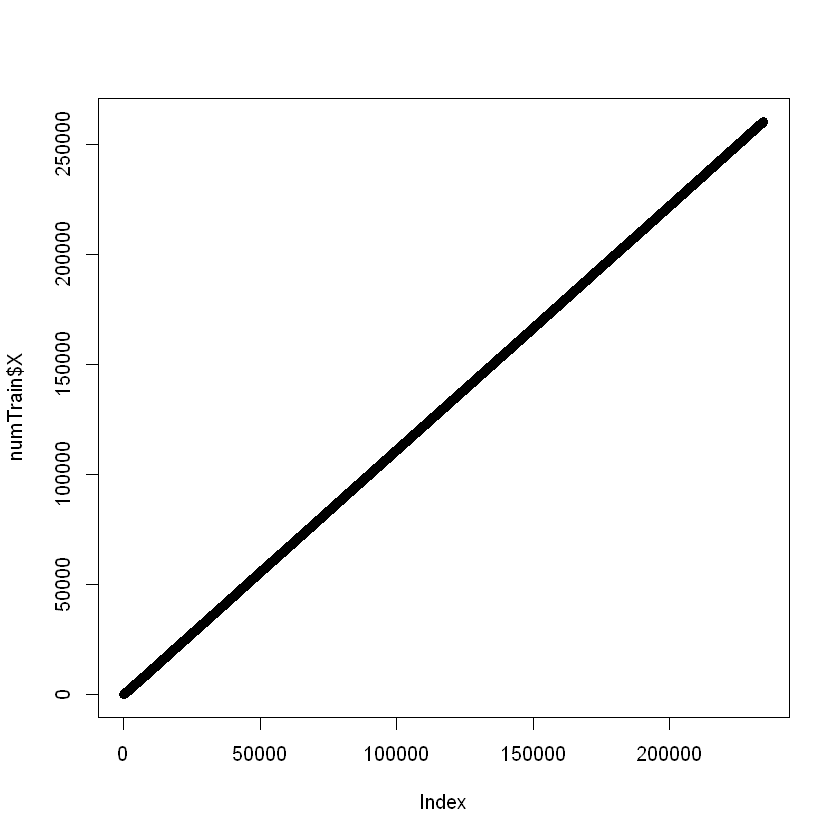

In [15]:
cor(numTrain)